<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Classification%20Networks/02_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classification

more than 2 classes as an option = *multiclass classification*
  - 3 diff classes: multiclass classification
  - 100 diff classes: multiclass classification

Practice: build a neural network to classify different images of clothing

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data has already been sorted into training and test sets
# Use tuples to import data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# Show first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [6]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

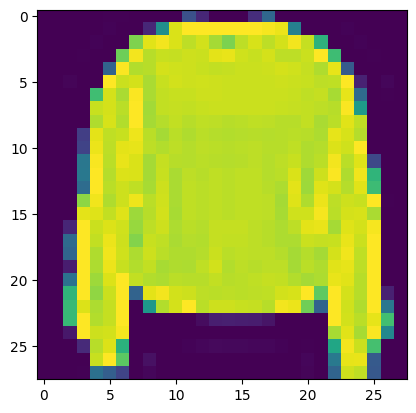

In [8]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [9]:
# Check samples label
train_labels[7]     # should return 2 = pullover

2

In [10]:
# Create a small list to index training labels so that they are words and not just numbers
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

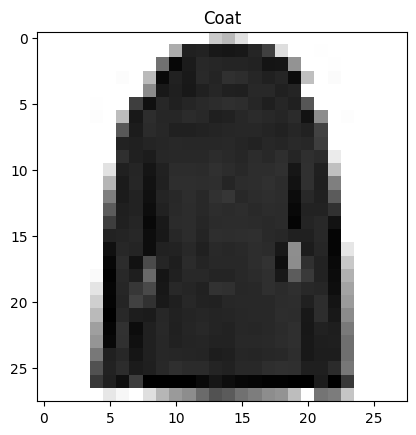

In [14]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

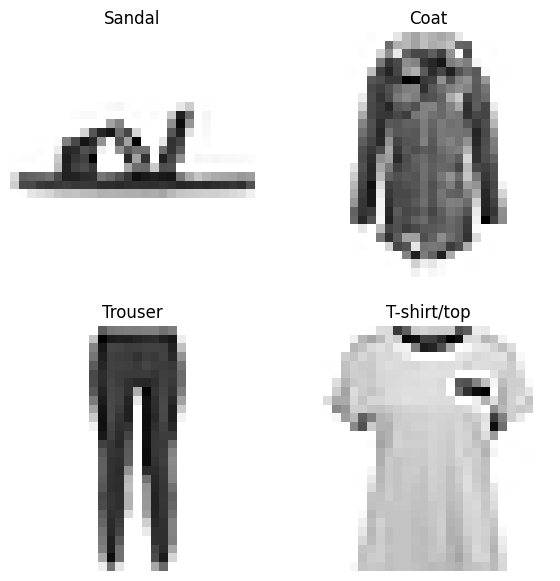

In [29]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Buidling a multi-class classification model

For multi-class classifictation model, can use similar architecture to binary classifiers, however there are a few differences:
  - input shape = 28 * 28 (shape of one image)
  - output shape = 10 (one per class of clothing)
  - loss function = tf.keras.losses.CategoricalCrossentropy
  - output layer activation = Softmax (not sigmoid)

In [35]:
# our data needs to be flattened (from (28, 28) to (None, 784))
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])
flatten_model.output_shape # 28 * 28 = 784
# neural networks like data to be in one long vector

(None, 784)

In [38]:
train_labels[:10] # training labels are as integers not one hot encoded
# Therefore categorical_crossentropy needs to be changed to sparse

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [42]:
train_labels.shape

(60000,)

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 1 per each class (10)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2269 - accuracy: 0.1554 - val_loss: 2.0994 - val_accuracy: 0.1796
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0744 - accuracy: 0.1839 - val_loss: 2.0277 - val_accuracy: 0.1972
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9284 - accuracy: 0.2242 - val_loss: 1.7189 - val_accuracy: 0.2654
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6570 - accuracy: 0.2861 - val_loss: 1.6122 - val_accuracy: 0.2866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5925 - accuracy: 0.3068 - val_loss: 1.5720 - val_accuracy: 0.3080
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5630 - accuracy: 0.3199 - val_loss: 1.5470 - val_accuracy: 0.3406
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5433 - accuracy: 0.3243 - val_loss: 1.5311 - val_accuracy:

In [45]:
# Model summary
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Check min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in tensors they try to find patterns in b/w 0 & 1.

In [52]:
# We can get our training and testing data b/w 0 & 1 by dividing by max
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check min and max values of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [57]:
# Set rand seed
tf.random.set_seed(42)

# Create model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1454 - accuracy: 0.5432 - val_loss: 0.8633 - val_accuracy: 0.6688
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7960 - accuracy: 0.6981 - val_loss: 0.7755 - val_accuracy: 0.7035
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7242 - accuracy: 0.7289 - val_loss: 0.7305 - val_accuracy: 0.7182
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6623 - accuracy: 0.7568 - val_loss: 0.6633 - val_accuracy: 0.7551
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6144 - accuracy: 0.7743 - val_loss: 0.6552 - val_accuracy: 0.7645
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5869 - accuracy: 0.7926 - val_loss: 0.6310 - val_accuracy: 0.7852
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5659 - accuracy: 0.8065 - val_loss: 0.6118 - val_accuracy: